In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import numpy as np
import pandas as pd
from scipy.spatial import distance

In [2]:
# --- Load First 100k Events ---
file_path = "/home/debabrata/Work/ML_IISERK/Rajdeep_sir/data/hgcal_pions_combinedHgc_Ahc_1.h5"
num_events = 50000

dataset =  h5py.File(file_path, 'r') 
for key in dataset.keys():
    print(key,dataset[key].shape)

energyLostBH (836658,)
energyLostBeam (836658,)
energyLostEE (836658,)
energyLostFH (836658,)
nhits (836658,)
rechit_energy (682645585,)
rechit_x (682645585,)
rechit_y (682645585,)
rechit_z (682645585,)
shower_start_layer (836658,)
true_energy (836658,)


In [ ]:
import h5py
import numpy as np
import pandas as pd

# Open the HDF5 file
file_path = "/home/debabrata/Work/ML_IISERK/Rajdeep_sir/data/hgcal_pions_combinedHgc_Ahc_1.h5"
with h5py.File(file_path, 'r') as f:
    # List all datasets in the file
    print("Datasets in the file:", list(f.keys()))
    
    # Load datasets into numpy arrays
    energyLostBH = f['energyLostBH'][:]
    energyLostBeam = f['energyLostBeam'][:]
    energyLostEE = f['energyLostEE'][:]
    energyLostFH = f['energyLostFH'][:]
    nhits = f['nhits'][:]
    rechit_energy = f['rechit_energy'][:]
    rechit_x = f['rechit_x'][:]
    rechit_y = f['rechit_y'][:]
    rechit_z = f['rechit_z'][:]
    shower_start_layer = f['shower_start_layer'][:]
    true_energy = f['true_energy'][:]

# Print shapes to confirm
print("energyLostBH shape:", energyLostBH.shape)
print("energyLostBeam shape:", energyLostBeam.shape)
print("energyLostEE shape:", energyLostEE.shape)
print("energyLostFH shape:", energyLostFH.shape)
print("nhits shape:", nhits.shape)
print("rechit_energy shape:", rechit_energy.shape)
print("rechit_x shape:", rechit_x.shape)
print("rechit_y shape:", rechit_y.shape)
print("rechit_z shape:", rechit_z.shape)
print("shower_start_layer shape:", shower_start_layer.shape)
print("true_energy shape:", true_energy.shape)

Datasets in the file: ['energyLostBH', 'energyLostBeam', 'energyLostEE', 'energyLostFH', 'nhits', 'rechit_energy', 'rechit_x', 'rechit_y', 'rechit_z', 'shower_start_layer', 'true_energy']


In [ ]:
with h5py.File(file_path, 'r') as f:
    nhits = f['nhits'][:num_events]
    true_energy = f['true_energy'][:num_events]
    energyLostBH = f['energyLostBH'][:num_events]
    energyLostBeam = f['energyLostBeam'][:num_events]
    energyLostEE = f['energyLostEE'][:num_events]
    energyLostFH = f['energyLostFH'][:num_events]
    shower_start_layer = f['shower_start_layer'][:num_events]
    total_hits = int(np.sum(nhits))

    rechit_energy = f['rechit_energy'][:total_hits]
    rechit_x = f['rechit_x'][:total_hits]
    rechit_y = f['rechit_y'][:total_hits]
    rechit_z = f['rechit_z'][:total_hits]

/home/debabrata/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


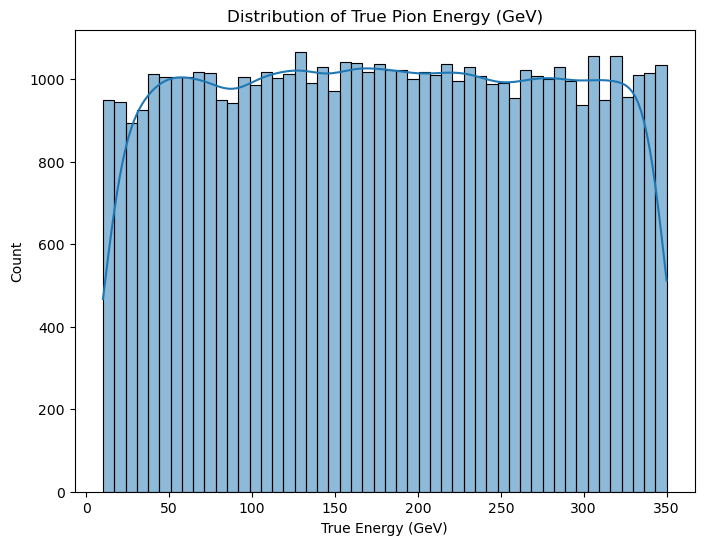

/home/debabrata/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


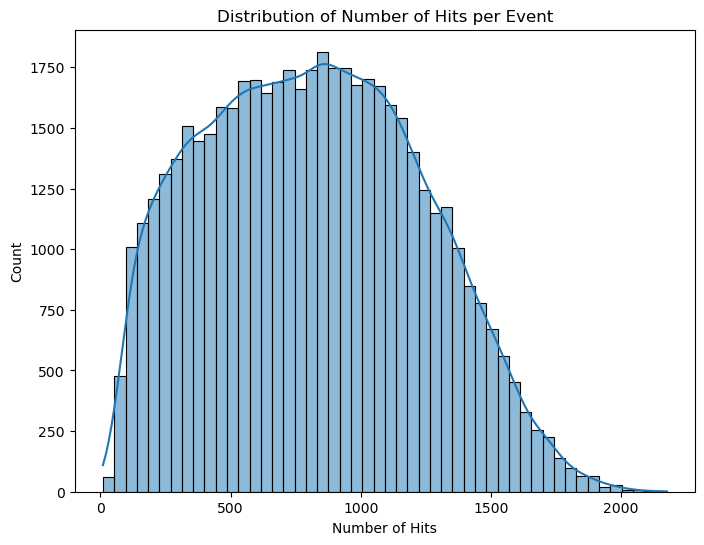

/home/debabrata/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of true_energy
plt.figure(figsize=(8, 6))
sns.histplot(true_energy, bins=50, kde=True)
plt.title('Distribution of True Pion Energy (GeV)')
plt.xlabel('True Energy (GeV)')
plt.ylabel('Count')
plt.show()

# Plot distribution of nhits
plt.figure(figsize=(8, 6))
sns.histplot(nhits, bins=50, kde=True)
plt.title('Distribution of Number of Hits per Event')
plt.xlabel('Number of Hits')
plt.ylabel('Count')
plt.show()

# Plot distribution of rechit_energy
plt.figure(figsize=(8, 6))
sns.histplot(rechit_energy, bins=50, kde=True, log_scale=(False, False))
plt.title('Distribution of Reconstructed Hit Energy (MIP)')
plt.xlabel('Reconstructed Hit Energy (MIP)')
plt.ylabel('Count (log scale)')
plt.show()

In [ ]:
# Compute cumulative hit indices
hit_indices = np.cumsum(nhits)
hit_start = np.concatenate(([0], hit_indices[:-1]))

# Example: Get hits for the first event
event_idx = 0
start_idx = hit_start[event_idx]
end_idx = hit_indices[event_idx]
event_hits = {
    'rechit_energy': rechit_energy[start_idx:end_idx],
    'rechit_x': rechit_x[start_idx:end_idx],
    'rechit_y': rechit_y[start_idx:end_idx],
    'rechit_z': rechit_z[start_idx:end_idx]
}
print(f"Event {event_idx} has {nhits[event_idx]} hits")
print(pd.DataFrame(event_hits).describe())